# kNN Regression(K-Nearest Neighbors Regressioin)
## 회귀, k-최근접 이웃 회귀, 결정계수, 과대적합과 과소적합
지도 학습의 한 종류인 회귀 문제를 이해하고 k-최근접 이웃 알고리즘을 사용해 농어의 무게를 예측하는 회귀 문제를 풀어보기

## KNN Regression(k-최근접 이웃 회귀)

분류 : 샘플을 몇 개의 클래스 중 하나로 분류하는 것
회귀 : 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 것

e.g. 내년도 경제 성장률 예측하기, 배달이 도착할 시간을 예측하기, 농어의 무게를 예측하기 (ch02에는 도미와 빙어 2개의 클래스가 있었고 특정 length, weight일 때 도미와 빙어 중 어느 클래스에 속하는지 분류)

💡회귀는 정해진 클래스가 없고, 임의의 수치를 출력한다!

<u>**📌왜 이름이 회귀???**</u>
> 키가 큰 사람의 아이가 부모보다 더 크지 않는다는 사실을 관찰하고 이를 평균으로 회귀한다라고 표현했다. 그 후 두 변수 사이의 상관관계를 분석하는 방법을 회귀라고 불렀다.

### KNN Classification 알고리즘
> 1. 예측하려는 샘플에 가장 가까운 샘플 k개를 선택 
> 2. 이 샘플들의 클래스를 확인하여 다수의 클래스를 새로운 샘플의 클래스로 예측 

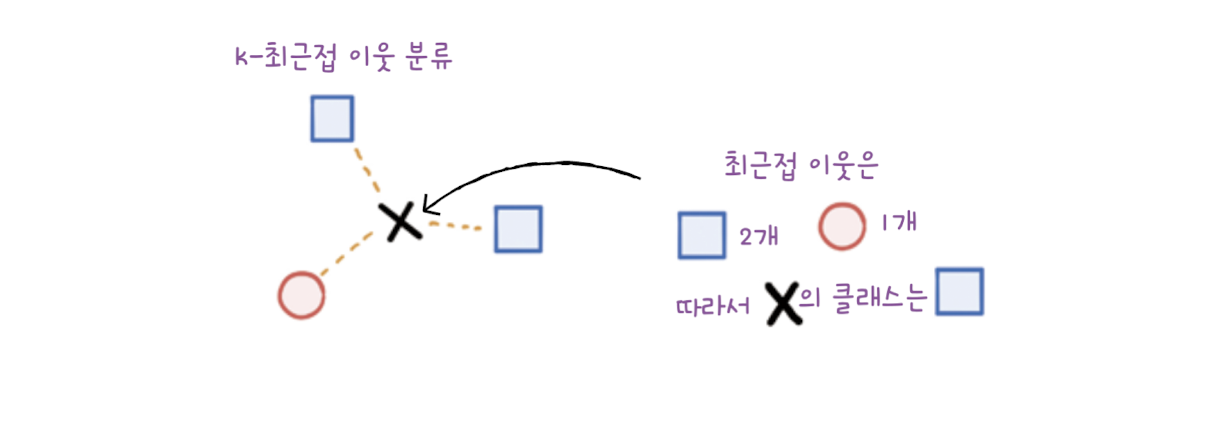

### KNN Regression 알고리즘
> 1. 예측하려는 샘플에 가장 가까운 샘플 k개를 선택 (공통점)
> 2. 이웃한 샘플의 타깃은 어떤 클래스가 아닌 임의의 수치 (회귀이기 때문)

📍이웃 샘플의 수치를 사용해 새로운 샘플 x의 타깃을 예측하는 간단한 방법에는 수치들의 평균을 구하는 것이다. 이웃한 샘플의 타깃값을 평균내면, 샘플 x의 예측 타깃값은 80이 된다. 
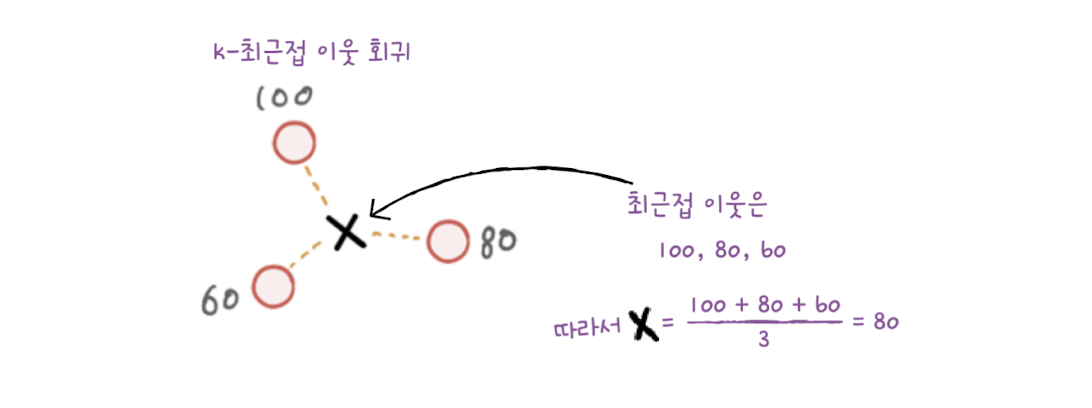

## 데이터 준비

In [2]:
# 농어의 길이만 있어도 무게를 잘 예측할 수 있지 않을까?
# 농어의 길이가 특성, 무게가 타깃

import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0,
       840.0, 685.0, 700.0, 700.0, 690.0, 900.0,  650.0, 820.0, 850.0, 900.0, 1015.0, 
       820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

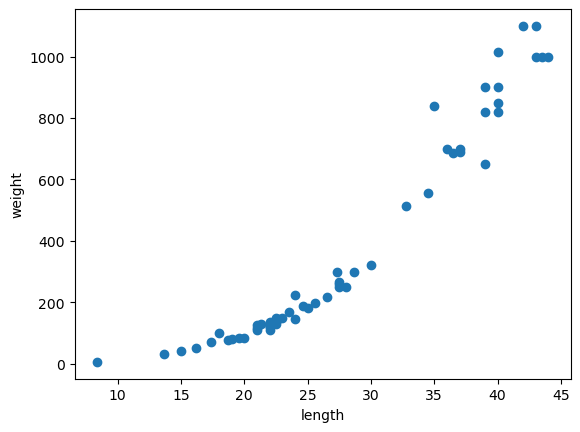

In [8]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [10]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

**사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다**

perch_length가 1차원배열이기 때문에 train_input, test_input모두 1차원 배열이기 때문에 1차원 배열을 1개의 열이 있는 2차원 배열로 바꿔야 한다.

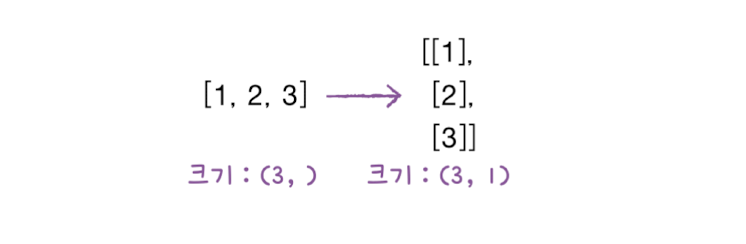

파이썬에서 1차원 배열의 크기는 원소가 1개인 튜플로 나타낸다. 

    [1, 2, 3] 의 크기는 (3,)
    
이를 이차원 배열로 만들기 위해 억지로 하나의 열을 추가했다. 

    [[1], [2], [3]]의 크기는 (3,1)
    
💡배열을 나타내는 방식만 달라졌을 뿐, 배열에 있는 원소의 개수는 동일하게 3개

ch02에서는 2개의 특성을 이용했기 때문에 열이 2개인 2차원 배열을 사용지만, 이번 예제는 특성을 1개만 사용하므로 수동으로 2차원 배열을 만들어야 한다. 

### reshape()
넘파이 배열의 크기를 바꿀 수 있는 메서드 

    바꾸려는 배열의 크기를 지정할 수 있다. 

🚨 reshape()는 크기가 바뀐 새로운 배열을 반환할 때, 지정한 크기가 원본 배열에 있는 원소의 개수와 다르면 에러가 발생한다. 

    (4,) 크기의 배열을 (2,3)으로 바꾸려고 하면 에러가 발생! 
    원본 배열의 원소는 4개인데 2X3=6개로 바꾸려고 했기 때문이다. 
    
    📍넘파이는 배열의 크기를 자동으로 지정하는 기능을 제공한다.
    크기에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미

In [12]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [13]:
# (2,2)로 변경하기
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [14]:
train_input.shape

(42,)

In [15]:
# (42,)를 (42,1)로 변경 : 이차원 배열로 변경하기
train_input = train_input.reshape(-1, 1) # 열 1개 만들면 되니까 행은 알아서
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결졍계수(R<sup>2</sup>)

In [16]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# K-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [18]:
# 테스트값을 넣어 얼마나 잘 예측하는지 확인
print(knr.score(test_input, test_target))

0.992809406101064


📍분류에서 score()

    정확도 = 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율
    즉, 정답을 맞춘 개수의 비율 
    
📍회귀에서 score()

    회귀에서는 정확한 숫자를 맞춘다는 것은 거의 불가능하다. 예측하는 값이나 타깃 모두 임의의 수치이기 때문! 
    회귀의 경우에는 결정계수를 이용해 평가한다. 
    
**📌<u>결정계수</u>**
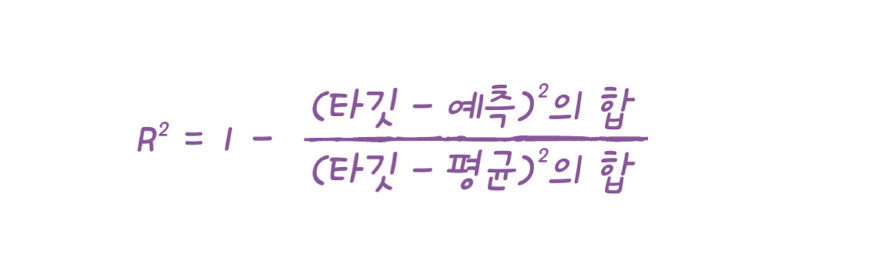

    예측이 타깃에 아주 가까워지면 분자가 0에 가까워지기 때문에 1에 가까운 값이 된다. 
    
📌사이킷런의 score() 메서드가 출력하는 값은 높으면 높을수록 좋다
- 예를 들어 정확도나 결정계수! 

### mean_absolute_error()
회귀 모델의 평균 절댓값 오차를 계산한다. 첫 번째 매개변수는 타깃, 두 번째 매개변수는 예측값을 전달한다. 

In [19]:
# 결정계수는 직감적으로 얼마나 좋은지 이해하기 어렵다
# 타깃과 예측한 값 사이의 차이를 구해 어느 정도 예측이 벗어났는지 확인
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만들기
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산하기
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


예측이 평균적으로 19g정도 타깃값과 다르다는 사실을 알 수 있다. 

지금까지 훈련 세트를 사용해 모델을 훈련하고, 테스트 세트로 모델을 평가했는데, 훈련 세트를 사용해 평가해보기 - score()에 훈련 세트를 전달해보기

In [20]:
print(knr.score(train_input, train_target))

0.9698823289099254


## 과대적합 vs 과소적합

- 과대적합(overfitting) : 훈련 세트에서는 점수가 좋았는데, 테스트 세트에서는 나쁜 경우 
    - 훈련 세트에만 잘 맞는 모델이라 테스트 세트나 실전에 투입하여 새로운 샘플에 대한 예측을 만들 때 잘 동작하지 않는다.
    - 너무 복잡해!!! 덜어내야해!!!
- 과소적합(underfitting) : 훈련 세트보다 테스트 세트의 점수가 높거나, 두 점수가 모두 너무 낮은 경우
    - 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우
    - 모델은 훈련 세트가 전체 데이터를 대표한다고 가정하기 때문에 훈련 세트를 잘 학습시키는 것이 중요하다. 
    - 단순해서 훈련이 안되니까 좀 더 복잡하게 !!!
    
📍과소적합이 일어나는 이유

    훈련세트와 테스트 세트의 크기가 매우 작기 때문에 발생하기도 한다. 데이터가 작으면 테스트 세트와 훈련 세트의 특징을 따르지 못할 가능성이 있다. 
    
> 위의 데이터는 과소적합!

💡과소적합 문제를 해결하기 위한 방법

    모델을 조금 더 복잡하게 만들기
 
✨**훈련 세트에 더 잘 맞게 만들면 테스트 세트의 점수는 조금 낮아질 것!**

📍KNN 알고리즘으로 모델을 더 복잡하게 만드는 방법
- 이웃의 개수인 k를 줄이기 
- 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고, 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따를 것! 

In [22]:
# KNN알고리즘의 이웃 개수를 기본값인 5에서 3으로 변경
# KNN클래스는 이웃의 개수를 바꾸기 위해 클래스 객체를 만들 필요가 없다.
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


k값을 줄였더니 훈련 세트의 결정계수 점수가 높아졌다. 

In [23]:
# 테스트 세트의 점수 확인하기
print(knr.score(test_input, test_target))

0.9746459963987609


- 훈련 세트보다 테스트 세트의 점수가 낮기 때문에 과소적합 문제 해결! 
- 점수의 차이가 크지 않으므로 과대적합 가능성이 낮음!